## League of Legend (LOL) Statistic Visualization

### Project Aim
To analyze and visualize the distributions of different classes and roles. Let's see if these values share evenly in the champion pool. Will there be fewer champions for ADC players to play than Top? Also, this project will try to analyze the correlations between Win Rate and other features.

**It is a multiplayer online battle arena video game developed and published by Riot Games. For people who aren't familiar with this game, a brief introduction will be listed in point form below.**

### Basic Rules/ Background
* Most prominent game mode - Summoner's Rift (Two teams of 5 players)
 * Winning Method: Destroy enemy's base
 * Each player will select their lane and champion to defend the base with "Turrents"
 * There are 3 lanes & regions - Top, Middle, Bottom. The regions in between two lanes is called Jungle.
 * 1 Player goes in the Top, 1 players in the Middle, 2 players in the Bottom (ADC & Support) and 1 player in the Jungle

* Every Champion has different skill sets, classes and roles in the game
 * Tank - Durable
 * Mage - Specializing in magic damage
 * Assassin - Specialize in infiltrating enemy
 * Fighter - Excel at both dealing and surviving damage
 * Marksman - Power almost exclusively revolves around their basic attacks
 - Support - Assist their allies and weak at alone
 
 ## Below is the Map & Structure of Summoner's Rift
 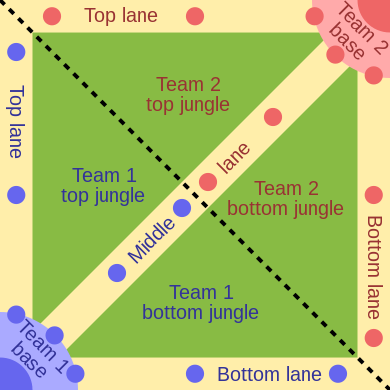

In [99]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,4) #Adjusts the configuration of the plots we will creat. Size of the Figure in inches

In [39]:
#Read the league of Legend Dataset and display the first 5 rows
df = pd.read_csv('League of Legends Champion Stats 12.3.csv')
df.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,S,59.99,4.88,48.06%,92.58%,5.03%,2.15%,1.87
1,Ahri,Mage,MID,God,95.22,39.37,53.40%,94.04%,15.29%,8.93%,2.59
2,Akali,Assassin,TOP,S,74.79,-12.94,48.48%,41.25%,5.10%,20.26%,2.08
3,Akali,Assassin,MID,S,64.77,-9.81,49.10%,58.10%,7.51%,20.26%,2.33
4,Akshan,Marksman,MID,A,54.42,-9.08,50.75%,59.43%,4.14%,18.73%,2.18


In [10]:
#Check structure of the data frame and see if any missing value exists
df.info()

df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    238 non-null    object 
 1   Class   238 non-null    object 
 2   Role    238 non-null    object 
 3   Tier    238 non-null    object 
 4   Score   238 non-null    float64
 5   Trend   238 non-null    float64
 6   Win %   238 non-null    object 
 7   Role %  238 non-null    object 
 8   Pick %  238 non-null    object 
 9   Ban %   238 non-null    object 
 10  KDA     238 non-null    float64
dtypes: float64(3), object(8)
memory usage: 20.6+ KB


(238, 11)

In [88]:
#Change the type of Win Rate, Role Rate, Pick Rate and Ban Rate from object to float64
#Remove % sign from the fields

for col in df.columns:
    if df[col].astype(str).str.endswith('%').any() == True:
       df[col] = df[col].astype(str).str.replace('%', '', regex=False).astype(float)
df.head()

,Name,Class,Role,Tier,Score,Trend,Win %,Role %,Pick %,Ban %,KDA
0,Aatrox,Fighter,TOP,S,59.99,4.88,48.06,92.58,5.03,2.15,1.87
1,Ahri,Mage,MID,God,95.22,39.37,53.40,94.04,15.29,8.93,2.59
2,Akali,Assassin,TOP,S,74.79,-12.94,48.48,41.25,5.10,20.26,2.08
3,Akali,Assassin,MID,S,64.77,-9.81,49.10,58.10,7.51,20.26,2.33
4,Akshan,Marksman,MID,A,54.42,-9.08,50.75,59.43,4.14,18.73,2.18


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    238 non-null    object 
 1   Class   238 non-null    object 
 2   Role    238 non-null    object 
 3   Tier    238 non-null    object 
 4   Score   238 non-null    float64
 5   Trend   238 non-null    float64
 6   Win %   238 non-null    float64
 7   Role %  238 non-null    float64
 8   Pick %  238 non-null    float64
 9   Ban %   238 non-null    float64
 10  KDA     238 non-null    float64
dtypes: float64(7), object(4)
memory usage: 20.6+ KB


In [90]:
#Check the distribution of 'Class' variable
df.Class.value_counts()

Fighter     70
Mage        62
Marksman    32
Tank        29
Assassin    26
Support     19
Name: Class, dtype: int64

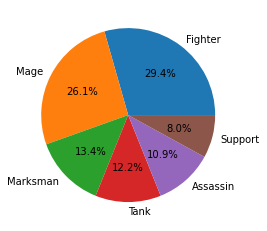

In [107]:
# plot the occurrence of different classes in the dataset

# 'autopct' displays the percentage upto 1 decimal place
# 'radius' sets the radius of the pie plot
plt.pie(df.Class.value_counts(), autopct = '%.1f%%', radius = 1, labels = ['Fighter', 'Mage', 'Marksman', 'Tank', 'Assassin', 'Support'])

plt.show()

**Observations**
* From the above pie plot, it can be seen that Fighter & Mage make up a large proportion of the whole category.
* Game Company might need to design more champions on the class Support to have a better balance and to diversify in playing style

In [104]:
#Check the distribution of 'Role' variable
df.Role.value_counts()

TOP        60
MID        59
JUNGLE     47
SUPPORT    41
ADC        31
Name: Role, dtype: int64

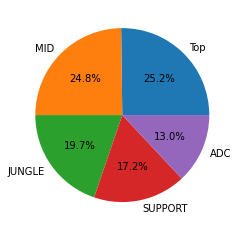

In [108]:
# plot the occurrence of different roles in the dataset

plt.pie(df.Role.value_counts(), autopct = '%.1f%%', radius = 1, labels = ['Top', 'MID', 'JUNGLE', 'SUPPORT', 'ADC'])

plt.show()

**Observations**
* From the above pie plot, we can see that Top & MID make up almost half of the whole category.
* However, it holds a more balanced ratio compared to Class. Players can't have a variety of champions to select in terms of Class, especially when they decided to play Assassin/ Tank. However, different catergories do share similar proportion from the Role perspective. 
* Therefore, players from different lanes will not experience any unfair situations, for example, lack of champions in the Middle lane while the Top lane can have diverse champions.
 

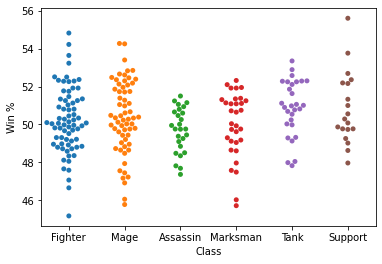

In [111]:
#check the relationship between the variables 'Win &' and 'Class'

sns.swarmplot(y = 'Win %', x = 'Class', data=df)

# display the plot
plt.show()

**Observation**
* Plot shows most of the observations of the Win Rate fall between 50 - 52 percent.
* In general, Support has great win rate among others.

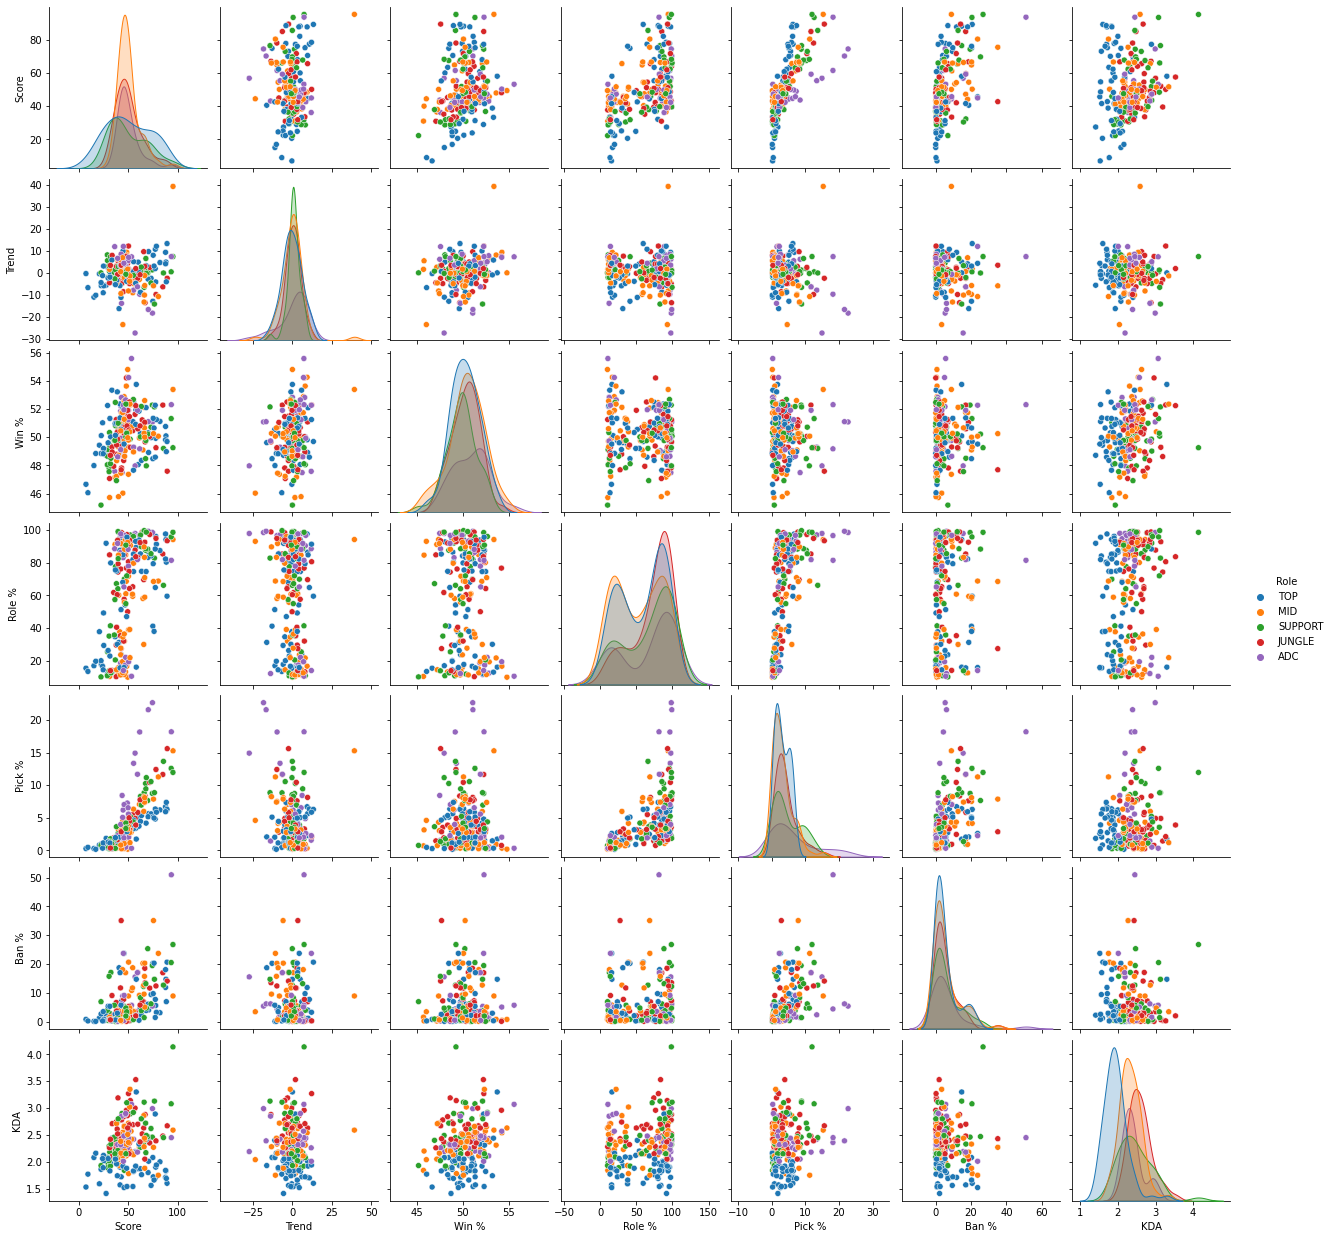

In [113]:
# plot a pair plot
sns.pairplot(df, hue='Role') #If you want a third feature overlayed, use the argument 'hue'

# display the plot
plt.show()

**Observation**
* The above plot shows the relationship between all the numerical variables. 'Win %' and 'KDA' seem to have a positive linear relationship with each other.

Let's create scatter plot to see the details

Text(0, 0.5, 'Win Rate')

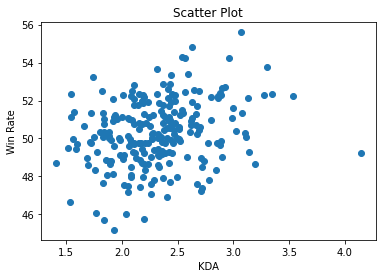

In [116]:
x = df['KDA']
y = df['Win %']


plt.scatter(x,y)

# Add the axes labels
plt.title('Scatter Plot')
plt.xlabel('KDA')
plt.ylabel('Win Rate')


**Observation**
* It shows a similar result (positive relationship) with the above plot. It is because KDA refers to players' kills, deaths, and assists. And **Higher** KDA means players kill/ assist in killing more and fewer deaths, indicating players dominate the game and lead to victory.

<AxesSubplot:>

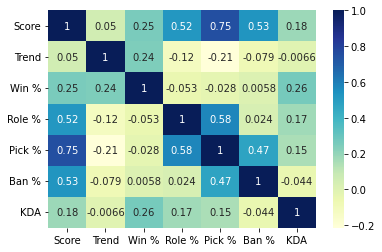

In [119]:
#Finally, let's use heatmap to find out any hidden factors that have a significant impact on the win rate.

sns.heatmap(df.corr(), annot = True, cmap= 'YlGnBu' )

Apart from KDA, the above plot shows Trend and Score both have a mild correlation with Win Rate. Meaning that the strengths of some specific champions can also greatly increase the percentage of wins despite the players' skills.


**Conclusion**
Multiple graphs are plotted to analyze and visualize the distributions of different classes and roles. Also, the correlations between Win Rate and other features are being visualized and studied. Few points can be made based on that information.
1. Distribution in Class is skewed toward Fighter & Mage. Only a small proportion of Champions being designed as Support & Assassin 
2. Values in Role share similarly
3. Support as a Champion class has a great win rate
4. KDA, Trend, and Score have a moderate correlation with Win Rate